# 로지스틱 회귀

- 의의 
    - 확률을 예측하는데에 사용되는 통계 모델
        - 특정 결과의 확률을 계산

    - 결과 값은 이진이어야함(결과는 둘 중 하나)
        - 원하는 결과는 1, 원하지 않는 결과는 0

    - 선형 회귀와 마찬가지로 다중공선성은 거의 없어야 함
        - 독립변수는 서로 독립적이어야 함

    - 종속변수와 관련없는 독립변수를 제거할 떄 더 효율적인 경향이 있음

- 장점
    - 많은 양의 연산 자원을 필요로 하지 않음
    - 쉽게 해석할 수 있음

- 단점
    - 비선형 데이터에 사용하기 힘듦
    - 과대적합에 취약함
    - 1과 0으로만 결과가 출력되기 때문에 범주형 결과를 예측하는데에만 사용 가능

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from scipy.special import expit, softmax

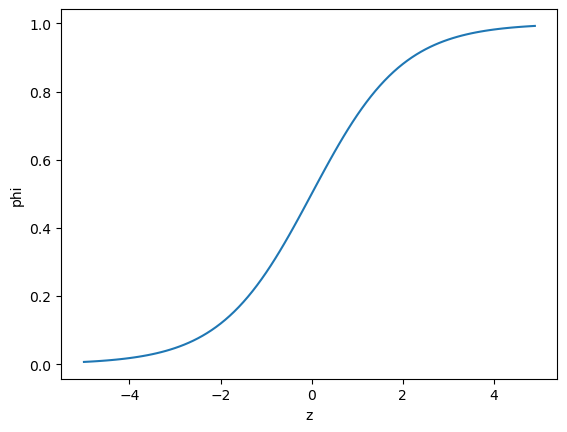

In [2]:
# 로지스틱 함수 시각화
z = np.arange(-5, 5, 0.1)

phi = 1 / (1 + np.exp(-z))

plt.plot(z, phi)
plt.xlabel("z")
plt.ylabel("phi")
plt.show()

## 데이터 준비

In [3]:
df = pd.read_csv("./data/Fish.csv")
df.head()

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340


In [4]:
df_bs = df[df["Species"].isin(["Bream", "Smelt"])]

In [5]:
df_bs.head()

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340


In [6]:
df_bs = df_bs.drop("Length1", axis =1)

In [7]:
df_bs.head(2)

,Species,Weight,Length2,Length3,Height,Width
0,Bream,242.0,25.4,30.0,11.52,4.0200
1,Bream,290.0,26.3,31.2,12.48,4.3056


In [8]:
df_bs.shape

(49, 6)

In [9]:
x = df_bs.drop("Species", axis=1)
y = df_bs["Species"]

In [10]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size= 0.25, random_state=25, stratify=y)

In [11]:
ss = StandardScaler()
scaled_train = ss.fit_transform(x_train)
scaled_test = ss.fit_transform(x_test)

## 모델 훈련

In [12]:
 logi = LogisticRegression()

In [13]:
logi.fit(scaled_train, y_train)

LogisticRegression()

In [14]:
logi.predict(scaled_test)

array(['Smelt', 'Smelt', 'Bream', 'Bream', 'Smelt', 'Bream', 'Bream',
       'Bream', 'Bream', 'Bream', 'Bream', 'Bream', 'Smelt'], dtype=object)

In [15]:
y_test.values

array(['Smelt', 'Smelt', 'Bream', 'Bream', 'Smelt', 'Bream', 'Bream',
       'Bream', 'Bream', 'Bream', 'Bream', 'Bream', 'Smelt'], dtype=object)

In [16]:
# 예측 확률 출력
logi.predict_proba(scaled_test)

array([[1.11204225e-01, 8.88795775e-01],
       [4.92090057e-02, 9.50790994e-01],
       [9.82466337e-01, 1.75336635e-02],
       [9.93988449e-01, 6.01155061e-03],
       [3.99690022e-02, 9.60030998e-01],
       [9.97667972e-01, 2.33202818e-03],
       [9.93570805e-01, 6.42919509e-03],
       [9.97215612e-01, 2.78438843e-03],
       [9.95150885e-01, 4.84911462e-03],
       [9.75548981e-01, 2.44510194e-02],
       [9.99401330e-01, 5.98670290e-04],
       [9.81452106e-01, 1.85478943e-02],
       [4.88297169e-02, 9.51170283e-01]])

In [17]:
# 종속변수 값 확인
logi.classes_

array(['Bream', 'Smelt'], dtype=object)

In [18]:
# 로지스틱 회귀 회귀식 확인
logi.coef_, logi.intercept_
# 값이 커질수록 예측 값과 멀어짐

(array([[-0.55117657, -0.77516225, -0.81202926, -0.86819376, -0.82122568]]),
 array([-2.71734119]))

In [19]:
x_train.columns

Index(['Weight', 'Length2', 'Length3', 'Height', 'Width'], dtype='object')

- 회귀식
  <br>z = Weight * -0.55 + Length2 * -0.78 + Length3 * -0.81 + Height * -0.86 + Width * -0.80 + -2.72

# 회귀식을 통한 확률값 계산

In [20]:
scaled_test[0]

array([-1.32604686, -1.21920614, -1.28212654, -1.34479803, -1.10956375])

In [21]:
- 1.3 * -0.55 + -1.21 * -0.78 + -1.28 * -0.81 + -1.34 * -0.86 + -1.11 * -0.8 + -2.72

2.0160000000000005

In [22]:
# z값 계산
decision_z = logi.decision_function(scaled_test)

In [23]:
decision_z

array([ 2.07849911,  2.96121761, -4.02594342, -5.10804287,  3.17886137,
       -6.05868218, -5.04045598, -5.88093875, -5.32409823, -3.68632846,
       -7.4202007 , -3.96867695,  2.96935402])

In [24]:
# z값을 로지스틱 함수를 통과시켜 확률값 계산
expit(decision_z)

array([8.88795775e-01, 9.50790994e-01, 1.75336635e-02, 6.01155061e-03,
       9.60030998e-01, 2.33202818e-03, 6.42919509e-03, 2.78438843e-03,
       4.84911462e-03, 2.44510194e-02, 5.98670290e-04, 1.85478943e-02,
       9.51170283e-01])

## 로지스틱 회귀로 다중 분류

In [25]:
df = df.drop("Length1", axis = 1)

In [26]:
df.head()

,Species,Weight,Length2,Length3,Height,Width
0,Bream,242.0,25.4,30.0,11.5200,4.0200
1,Bream,290.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,26.5,31.1,12.3778,4.6961
3,Bream,363.0,29.0,33.5,12.7300,4.4555
4,Bream,430.0,29.0,34.0,12.4440,5.1340


In [27]:
df.shape

(159, 6)

In [28]:
x = df.drop("Species", axis =1)
y = df["Species"]

In [29]:
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=25, test_size=0.25, stratify=y)

In [30]:
ss = StandardScaler()
scaled_train = ss.fit_transform(x_train)
scaled_test = ss.fit_transform(x_test)

In [31]:
logi = LogisticRegression()

In [32]:
logi.fit(scaled_train, y_train)

LogisticRegression()

In [33]:
print(logi.score(scaled_train, y_train))
print(logi.score(scaled_test, y_test))

0.7983193277310925
0.875


In [34]:
logi.predict(scaled_test)

array(['Parkki', 'Perch', 'Bream', 'Bream', 'Perch', 'Bream', 'Bream',
       'Perch', 'Perch', 'Bream', 'Perch', 'Pike', 'Perch', 'Bream',
       'Perch', 'Perch', 'Pike', 'Smelt', 'Parkki', 'Perch', 'Parkki',
       'Bream', 'Perch', 'Perch', 'Perch', 'Smelt', 'Perch', 'Perch',
       'Pike', 'Roach', 'Bream', 'Smelt', 'Perch', 'Perch', 'Perch',
       'Perch', 'Smelt', 'Perch', 'Pike', 'Bream'], dtype=object)

In [35]:
# 예측 확률값 확인
proba = logi.predict_proba(scaled_test[:5])
print(np.round(proba, decimals=3))

[[0.134 0.339 0.236 0.009 0.228 0.009 0.046]
 [0.066 0.    0.757 0.045 0.006 0.    0.125]
 [0.937 0.005 0.017 0.004 0.003 0.    0.035]
 [0.87  0.035 0.027 0.008 0.02  0.    0.04 ]
 [0.013 0.049 0.631 0.024 0.236 0.012 0.036]]


In [36]:
# 종속변수 확인
logi.classes_

array(['Bream', 'Parkki', 'Perch', 'Pike', 'Roach', 'Smelt', 'Whitefish'],
      dtype=object)

In [37]:
# 회귀식 확인
logi.coef_

array([[-0.17889597, -0.11508531,  0.63790276,  2.91612192, -0.30484797],
       [-0.37727812, -0.76307671, -0.76762666,  1.86694937, -0.81949963],
       [ 1.22247306,  0.25743319, -1.37969577, -1.71876873,  1.82244495],
       [ 0.00635841,  1.69393361,  1.72420229, -1.26174022, -0.58293891],
       [-0.85231989, -0.41172305,  0.35342447, -0.4190997 ,  0.50221437],
       [-0.3809552 , -0.66812642, -0.65763502, -1.42593859, -1.53972631],
       [ 0.5606177 ,  0.00664469,  0.08942794,  0.04247594,  0.92235351]])

In [38]:
logi.intercept_

array([ 0.48878562, -0.22107658,  2.26987021, -0.03786623,  0.92249623,
       -3.84479978,  0.42259053])

- 현재의 로지스틱 다중분류에서 독립변수는  5개를 사용하기 때문에 coef_ 배열의 열은 5개임

- 종속변수의 범주 수가 7개 이기 때문에 coed_배열의 행과 intercept의 행은 7개임
  - 즉, 로짓틱 다중분류는 각 클래스마다 z값을 계산함
  - 이때 확률값은 각각의 z값을 합이 1이 되도록 압축하기 위해 소프트맥스 함수(softmax)를 사용

### 회귀식을 통한 확률값 계산

In [ ]:
decision_z = logi.decision_function(scaled_test[:5])
np.round(decision_z, decimals=2)

array([[ 0.63,  1.56,  1.2 , -2.07,  1.17, -2.06, -0.44],
       [ 2.47, -2.73,  4.91,  2.09,  0.13, -9.97,  3.11],
       [ 5.64,  0.31,  1.63,  0.08, -0.14, -9.86,  2.34],
       [ 4.19,  0.99,  0.72, -0.47,  0.41, -6.95,  1.1 ],
       [-1.37, -0.05,  2.51, -0.78,  1.52, -1.48, -0.35]])

In [42]:
proba = softmax(decision_z, axis=1) # axis = 1 : 각 행에 대해서 소프트맥스 계산
np.round(proba, decimals = 3)

array([[0.134, 0.339, 0.236, 0.009, 0.228, 0.009, 0.046],
       [0.066, 0.   , 0.757, 0.045, 0.006, 0.   , 0.125],
       [0.937, 0.005, 0.017, 0.004, 0.003, 0.   , 0.035],
       [0.87 , 0.035, 0.027, 0.008, 0.02 , 0.   , 0.04 ],
       [0.013, 0.049, 0.631, 0.024, 0.236, 0.012, 0.036]])

# 정리

- 로지스틱 회귀는 선형 회귀처럼 선형 방정식을 사용

- 방정식의 값을 0 ~ 1 사이로 압축
  - 해당 값을 0 ~ 100% 사이의 확률로 이해할 수 있음

- 이진 분류
    1. 하나의 선형 방정식을 훈련
    2. 출력 값을 시그모이드 함수에 통과시켜 0 ~ 1 사이의 값을 만듦
    3. 2번의 출력값이 양성 클래스에 대한 확률

- 다중 분류
    1. 클래스 개수만큼 방정식을 훈련
    2. 각 방정식의 출력값을 소프트맥스 함수를 통과시켜 전체 클래스에 대한 합이 항상 1이 되도록 계산
    3. 2번의 출력값이 각 클래스에 대한 확률값